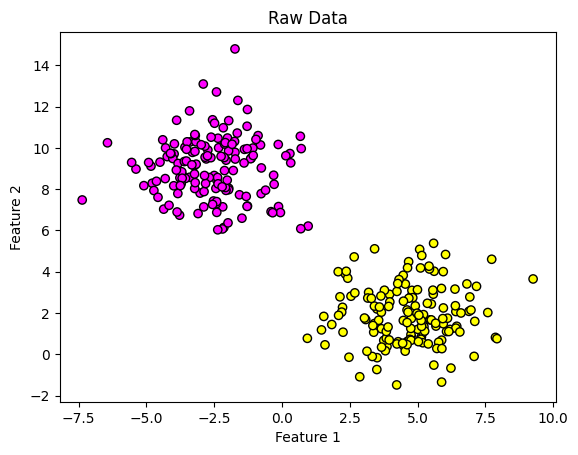

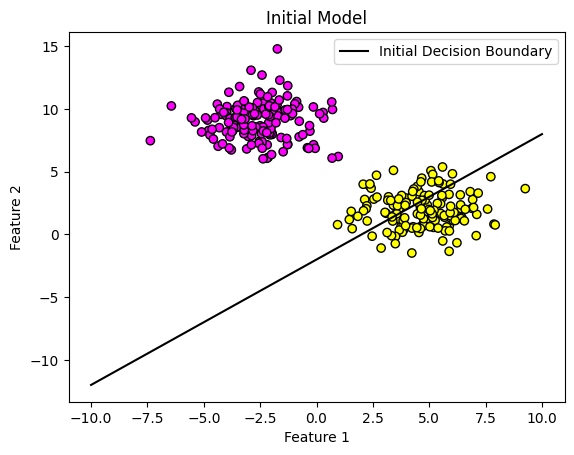


Number of Samples:  300


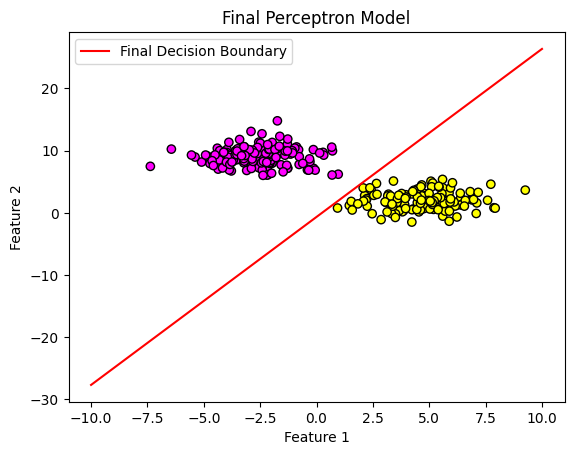

Number of Iterations: 2


In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import random

X, Y = make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)
Y = Y.reshape(-1, 1)

plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap='spring', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Raw Data')
plt.show()

weights = np.random.randint(low=-2, high=2, size=(2, 1)).astype(float)

if weights[1, 0] == 0:
    weights[1, 0] = random.randint(1, 10)

bias = random.randint(-2, 2)

x_vals = np.linspace(-10, 10, 10)
slope = -weights[0, 0] / weights[1, 0]
y_intercept = -bias / weights[1, 0]
y_vals = slope * x_vals + y_intercept

plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap='spring', edgecolors='k')
plt.plot(x_vals, y_vals, '-', color='black', label='Initial Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Initial Model')
plt.legend()
plt.show()

print("\nNumber of Samples: ", Y.shape[0])

def perceptron(X, Y, weights, bias, max_iters=1000):
    samples, features = X.shape
    iterations = 0

    while iterations < max_iters:
        error_count = 0

        for i in range(samples):
            y_pred = np.dot(X[i], weights) + bias
            y_pred = 1 if y_pred > 0 else 0

            if y_pred != Y[i]:
                error_count += 1
                update = X[i].reshape(2, 1) if Y[i] == 1 else -X[i].reshape(2, 1)
                weights += update
                bias += 1 if Y[i] == 1 else -1

        iterations += 1

        if error_count == 0:
            break

    return iterations, weights, bias

iterations, updated_weights, updated_bias = perceptron(X, Y, weights, bias)

final_slope = -updated_weights[0, 0] / updated_weights[1, 0]
final_y_intercept = -updated_bias / updated_weights[1, 0]
final_y_vals = final_slope * x_vals + final_y_intercept

plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap='spring', edgecolors='k')
plt.plot(x_vals, final_y_vals, '-', color='red', label='Final Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Model')
plt.legend()
plt.show()

print("Number of Iterations:", iterations)
